In [53]:
#Week 5 Assignment
#Jenna Honeywell 
#MSDS 422

In [ ]:
#You will compete in the Kaggle.com Digit Recognizer competition which involves classical digit recognition from hand-written
#images.

#Read the competition rules, and download the MNIST training and test set data.This binary classification task is NOT what
#is required for the current assignment. In this assignment we are asking for a multiclass classifier. The entire MNIST data
#set will be used for input data. For this assignment, you will develop a classifier that may be used to predict which of 
#the 10 digits is being written.  

#(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set
#(train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to
#Kaggle.com.

#(2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal 
#components that represent 95 percent of the variability in the explanatory variables. The number of principal components 
#in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the
#principal components.

#(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. 
#Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com.

#(4) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that
#is consistent with a training-and-test regimen, and submit this to Kaggle.com.

#Report total elapsed time measures for the training set analysis. It is sufficient to run a single time-elapsed test for
#this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the 
#programs, much as the Benchmark Example programs do.

In [65]:
import pandas as pd
import numpy as np
import time
import os.path

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model 
from time import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, f1_score as f1 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [56]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
train.info()
print(train['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [58]:
x_train = train.drop(labels = ["label"], axis=1) 
y_train = train["label"]
x_test = test

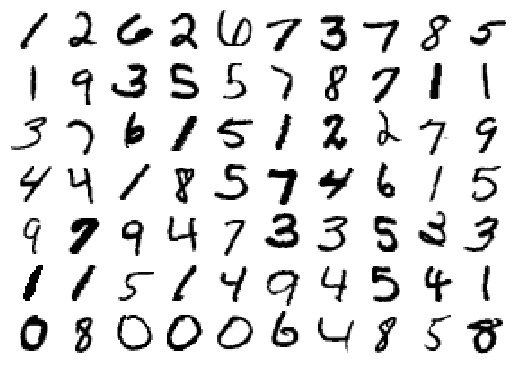

In [59]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[x_train[:12000:600], x_train[13000:30600:600], x_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

# **Random Forest**

Fitting a random forest classifier model to the full set of 784 explanatory variables.  

In [60]:
rfc_grid = {
    'max_depth' : [5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,7]
}

In [61]:
# run GridSearchSV
rfc = RandomForestClassifier(max_features='sqrt', bootstrap=True, n_estimators=10, random_state=42, n_jobs=-1)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_grid, cv=5)
rfc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                     

In [62]:
# find best params
rfc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [67]:
# run rf classifier with optimized params
rfc = RandomForestClassifier(max_features='sqrt', bootstrap=True, max_depth=20, min_samples_leaf=1,
                        min_samples_split=10, n_estimators=500, random_state=42, n_jobs=-1)

# fit model and record time elapsed - record time to fit model
rf_start_time = time()
rfc.fit(x_train, y_train)
rf_elapsed_time = time() - rf_start_time
print("Time elapsed: {:.3f}".format(rf_elapsed_time))

# run 5 fold cv
cv_rfc = cross_val_score(rfc, x_train, y_train, cv=5, scoring="accuracy")
cv_rfc

Time elapsed: 32.468


array([0.96119048, 0.96285714, 0.9602381 , 0.96369048, 0.96535714])

In [71]:
# predict y's from training set
#y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=5)
#print(y_train_pred)
start = time()
y_train_pred = rfc.predict(x_train)
print(f"Train score : {rfc.score(x_train,y_train)}")
duration = time() - start
print("Time elapsed: {:.3f}".format(duration))

Train score : 0.9972619047619048
Time elapsed: 4.356


In [14]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[4131,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0, 4678,    3,    0,    0,    0,    0,    1,    1,    1],
       [   0,    1, 4167,    0,    1,    0,    0,    6,    1,    1],
       [   0,    0,    4, 4334,    0,    0,    0,    6,    2,    5],
       [   1,    1,    0,    0, 4057,    0,    2,    1,    0,   10],
       [   2,    0,    0,    0,    0, 3792,    1,    0,    0,    0],
       [   3,    2,    0,    0,    0,    1, 4131,    0,    0,    0],
       [   0,    4,    6,    0,    0,    0,    0, 4387,    0,    4],
       [   0,    8,    0,    2,    1,    0,    0,    0, 4047,    5],
       [   5,    2,    0,    2,    4,    0,    0,   13,    1, 4161]],
      dtype=int64)

In [15]:
# compute f1 score
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="macro")

0.9972935365349821

In [16]:
# run model on test data
y_test_pred = rfc.predict(x_test)
print(y_test_pred[:10])

df_rfc=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_test_pred})
df_rfc.to_csv('rfc.csv', index=False)

#Kaggle .96557 - username: Jenna Honeywell

[2 0 9 9 3 7 0 3 0 3]


## **Random Forest with PCA**

Executing PCA on combined training and test set data.

In [74]:
#PCA
all_data = pd.concat([train, test])
all_data.shape

C:\Users\jrh597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(70000, 785)

In [82]:
ss = StandardScaler()
x_pca = all_data.drop(columns=['label'])
x_pca_scaled = ss.fit_transform(x_pca)
y_pca = pd.DataFrame(all_data['label'])

In [83]:
# run PCA on combined test and train data 
#Record time it takes to identify PCA
PCA_start_time = time()

pca = PCA(n_components=0.95, random_state=42)
pca.fit(x_pca_scaled)

PCA_elapsed_time = time() - PCA_start_time
print("Time elapsed: {:.3f}".format(PCA_elapsed_time))
print("Number of principal components:", pca.n_components_)

Time elapsed: 6.364
Number of principal components: 332


In [84]:
#PCA with random forest 
# run PCA on train and test with 332 components
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)

In [90]:
#Checking to make sure that the datasets are PCA transformed 
print(x_train_reduced.shape)
print(x_test_reduced.shape)

(42000, 332)
(28000, 332)


In [91]:
# set up gridsearch params
rfc_pca_param_grid = { 
    'max_depth' : [5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,7]
}

In [92]:
# run GridSearchSV
start_time = time()

rfc_pca = RandomForestClassifier(max_features='sqrt', bootstrap=True, n_estimators=10, random_state=23, n_jobs=-1)
CV_rfc_pca = GridSearchCV(estimator=rfc_pca, param_grid=rfc_pca_param_grid, cv=5)
CV_rfc_pca.fit(x_train_reduced, y_train)

elapsed_time = time() - start_time

In [93]:
# find best params
CV_rfc_pca.best_params_

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [94]:
# run rf classifier with PCA and optimized params
rfc_pca = RandomForestClassifier(max_features='sqrt', bootstrap=True, max_depth=20, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=500, random_state=23, n_jobs=-1)

# fit model and record time elapsed
#Record time to fit model 
rf_pca_start_time = time()
rfc_pca.fit(x_train_reduced, y_train)
rf_pca_elapsed_time = time() - rf_pca_start_time
print("Time elapsed: {:.3f}".format(rf_pca_elapsed_time))

# run 5 fold cv
cv_rfc_pca = cross_val_score(rfc_pca, x_train_reduced, y_train, cv=5, scoring="accuracy")
cv_rfc_pca

Time elapsed: 118.604


array([0.94404762, 0.94392857, 0.94011905, 0.94333333, 0.94571429])

In [95]:
# predict y's from training set
y_train_pred_rf_pca = cross_val_predict(rfc_pca, x_train_reduced, y_train, cv=5)

#y_train_pred_rf_pca = rfc.predict(x_train_reduced)
#print(f"Train score : {rfc.score(x_train_reduced,y_train)}")

In [96]:
# create confusion matrix
confusion_matrix(y_train, y_train_pred_rf_pca)

array([[4033,    1,    8,    3,    5,    5,   25,    7,   43,    2],
       [   0, 4598,   29,   15,    9,   10,   10,    4,    8,    1],
       [  27,   10, 3965,   22,   42,    6,   17,   43,   42,    3],
       [   8,   10,   95, 3968,    6,   79,   10,   60,   70,   45],
       [   5,    8,   14,    0, 3820,    2,   32,    6,   12,  173],
       [  16,    4,   13,   83,   20, 3549,   40,   12,   24,   34],
       [  31,    4,    4,    1,   17,   32, 4035,    0,   13,    0],
       [   4,   25,   53,    5,   35,    3,    0, 4158,    5,  113],
       [  13,   29,   32,  105,   27,   76,   24,   14, 3685,   58],
       [  24,    9,    9,   71,  126,   14,    6,   75,   41, 3813]],
      dtype=int64)

In [97]:
# compute f1 score
f1_score(y_train, y_train_pred_rf_pca, average="macro")

0.9429238007833911

In [98]:
# run rf pca model on test data
y_test_pred_rf_pca = rfc_pca.predict(x_test_reduced)
print(y_test_pred_rf_pca[:10])

df_rfc_pca=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_test_pred_rf_pca})
df_rfc_pca.to_csv('rfc_pca.csv', index=False)

#Kaggle .92114 - username: Jenna Honeywell


[2 0 9 7 3 7 0 3 0 3]


### **PCA 2 - Fixing Flaw in First PCA Model**

The first PCA model had a major design flaw.  The flaw being that PCA was run on the combined test and training data sets.  This model runs PCA on just the train data and applies that transform to both training and test data. 

In [104]:
#Fixing Flaw - running PCA on just train data instead of combined test and train datasets
#then applying the transform to both test and train 
x_train_scaled = ss.fit_transform(x_train)

PCA_start_time = time()

pca2 = PCA(n_components=0.95)
pca2.fit(x_train_scaled)

PCA_elapsed_time = time() - PCA_start_time
print("Time elapsed: {:.3f}".format(PCA_elapsed_time))
print("Number of principal components:", pca2.n_components_)


Time elapsed: 3.912
Number of principal components: 320


In [105]:
# transform PCA from above onto train
x_train_reduced2 = pca2.transform(x_train)
x_test_reduced2 = pca2.transform(x_test)

In [107]:
#Checking to make sure that the datasets are PCA transformed 
print(x_train_reduced2.shape)
print(x_test_reduced2.shape)

(42000, 320)
(28000, 320)


In [108]:
# set up gridsearch params
rfc_pca_param_grid2 = { 
    'max_depth' : [5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,7]
}

In [109]:
# run GridSearchSV
start_time = time()

rfc_pca2 = RandomForestClassifier(max_features='sqrt', bootstrap=True, n_estimators=10, random_state=42, n_jobs=-1)
CV_rfc_pca2 = GridSearchCV(estimator=rfc_pca2, param_grid=rfc_pca_param_grid2, cv=5)
CV_rfc_pca2.fit(x_train_reduced2, y_train)

elapsed_time = time() - start_time

In [110]:
# find best params
CV_rfc_pca2.best_params_

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [112]:
# run rf classifier with PCA and optimized params
rfc_pca2 = RandomForestClassifier(max_features='sqrt', bootstrap=True, max_depth=20, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=500, random_state=42, n_jobs=-1)

# fit model and record time elapsed
rf_pca_start_time = time()
rfc_pca2.fit(x_train_reduced2, y_train)
rf_pca_elapsed_time = time() - rf_pca_start_time
print("Time elapsed: {:.3f}".format(rf_pca_elapsed_time))

# run 5 fold cv
cv_rfc_pca2 = cross_val_score(rfc_pca2, x_train_reduced2, y_train, cv=5, scoring="accuracy")
cv_rfc_pca2

Time elapsed: 108.178


array([0.9477381 , 0.94869048, 0.94261905, 0.94833333, 0.95369048])

In [113]:
# predict y's from training set
y_train_pred_rf_pca2 = cross_val_predict(rfc_pca2, x_train_reduced2, y_train, cv=5)


#y_train_pred_rf_pca2 = rfc.predict(x_train_reduced2)
#print(f"Train score : {rfc.score(x_train_reduced2,y_train)}")

In [114]:
# create confusion matrix
confusion_matrix(y_train, y_train_pred_rf_pca2)

array([[4057,    0,   10,    7,    2,    5,   31,    2,   17,    1],
       [   0, 4585,   36,   19,    4,    3,   14,    9,   12,    2],
       [  26,   11, 3939,   41,   33,    3,   25,   42,   51,    6],
       [   8,    4,   89, 4035,    4,   60,   10,   33,   70,   38],
       [   4,   14,   22,    1, 3890,    1,   31,    9,    7,   93],
       [  25,    2,   14,  106,   20, 3535,   48,    2,   25,   18],
       [  31,    6,    5,    0,    7,   38, 4043,    0,    7,    0],
       [   7,   27,   56,    7,   45,    3,    0, 4169,    7,   80],
       [  13,   25,   41,  132,   22,   45,   24,   16, 3702,   43],
       [  25,    7,   14,   75,   87,   12,    2,   71,   25, 3870]],
      dtype=int64)

In [115]:
# compute f1 score
f1_score(y_train, y_train_pred_rf_pca2, average="macro")

0.9478253305961306

In [116]:
# run rf pca model on test data
y_test_pred_rf_pca2 = rfc_pca2.predict(x_test_reduced2)
print(y_test_pred_rf_pca2[:10])

df_rfc_pca2=pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label': y_test_pred_rf_pca2})
df_rfc_pca2.to_csv('rfc_pca2.csv', index=False)

#Kaggle .93985 - username: Jenna Honeywell

[2 0 9 7 3 7 0 3 0 3]
